## Flumph met 3 toestanden

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def calulcate_future(n_days, chances, matrix):
    days = [chances]
    
    for i in range(n_days):
        days.append(np.dot(days[-1], matrix))
        
    return days

In [3]:
def most_likely_state(data):
    most_likely_index = 0
    first_date = 0
    
    for i in range(len(data[-1])):
        if data[-1][i] > data[-1][most_likely_index]:
            most_likely_index = i
    
    # now that we know what is most likely to be the state, we check from what day this has been the most likely
    for day in reversed(range(len(data[:-2]))):
        for field in range(len(data[0])):
            if field == most_likely_index:
                continue
                
            if data[day][field] > data[day][most_likely_index]:
                # Return the day, add 1 becuase otherwise we are returning the index not the day.
                return most_likely_index, data[-1][most_likely_index], day + 1
    
    return most_likely_index, data[-1][most_likely_index], 0

In [4]:
def plot(data):
    axes = plt.gca()
    axes.set_xlim([0, len(data) - 1])
    axes.set_ylim([0,1])
    plt.plot(data)
    
    plt.gca().legend(states)

    plt.ylabel('Chance')
    plt.xlabel('Days')
    plt.show()

In [5]:
states = [
    'hungry',
    'Satisfied',
    'Hunted',
    'Aggresive' # Used in next part
]

matrix = [
    [0.8, 0.1, 0.1], # Hongerig
    [0.4, 0.5, 0.1], # Tevreden
    [0.6, 0.2, 0.2]  # Opgejaagd
]

newbornFlumphChances = [0.1, 0.7, 0.2]
days = 10

flumphChances = calulcate_future(days, newbornFlumphChances, matrix)
final_state, chance, start_date = most_likely_state(flumphChances)

print('Starting at day '+ str(start_date) +' Flumph will most likely be ' + states[final_state] + ' he/she has a ' + str(round(chance * 100, 2)) + '% chance to be so.')

Starting at day 1 Flumph will most likely be hungry he/she has a 70.36% chance to be so.


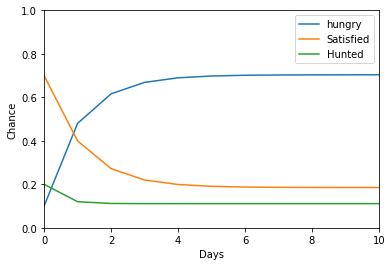

In [6]:
plot(flumphChances)

## Flumph met 4 toestanden

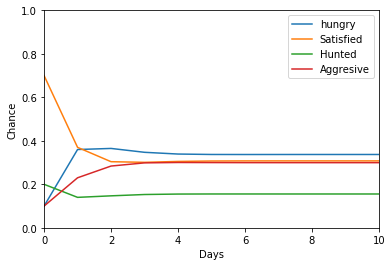

Starting at day 2 Flumph will most likely be hungry he/she has a 33.72% chance to be so.


In [7]:
matrix = [
    [0.5, 0.1, 0.1, 0.3], # Hongerig
    [0.4, 0.4, 0.1, 0.1], # Tevreden
    [0.1, 0.2, 0.2, 0.5], # Opgejaagd
    [0.1, 0.4, 0.2, 0.3]  # Agressief
]

newbornFlumphChances = [0.1, 0.7, 0.2, 0.1]
days = 10

flumphChances = calulcate_future(days, newbornFlumphChances, matrix)
plot(flumphChances)
final_state, chance, start_date = most_likely_state(flumphChances)

print('Starting at day '+ str(start_date) +' Flumph will most likely be ' + states[final_state] + ' he/she has a ' + str(round(chance * 100, 2)) + '% chance to be so.')